<div id="container" style="position:relative;">
<div style="float:left"><h1> Capstone Project </h1></div>
<div style="float:right"><h1 style="font-size:16px;"> Date: 10th November 2023 </h1></div>
</div>

## Loan Default Prediction

___

### Author Information:

Name:    **David Clarke**

Contact:    **dac240@georgetown.edu**

___

## Sprint 2 Notebook

Sprint 1 uncovered learnings regarding data quality, feature engineering and other preprocessing concerns. In this notebook, the focus is data preprocessing and feature engineering as the dataset is prepared for modeling and a baseline model is created. Finally, the next steps in terms of advanced modeling are outlined.

### Table of Contents

* [EDA](#Exploratory-Data-Analysis-(EDA))
* [Data Preprocessing & Feature Engineering](#Data-Preprocessing-&-Feature-Engineering)
* [Baseline Modeling](#Baseline-Modeling)
* [Next Steps](#Next-Steps:-Advanced-Modeling-&-Productizing-the-work)

In [1]:
# Import the relevant libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm

This dataset was obtained from Kaggle and the original source is a challenge hosted by Coursera where it is defined as a 'real world dataset' without revealing the actual company or specifics surrounding where the data originated. 

In [2]:
# Read in the data from the CSV file and assign to variable 'df'

df = pd.read_csv('data/Loan_default.csv')

## Exploratory Data Analysis (EDA)

The first step in EDA is using 'head' to take a first glimpse of the data.

In [3]:
# Initial check of the first 5 rows in the dataset

df.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


In [4]:
# Check of 5 randomly selected rows in the dataset

df.sample(5)

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
121035,09VAFGLRS7,55,119192,167517,507,30,1,19.27,60,0.24,Master's,Part-time,Single,No,No,Home,No,0
98620,83JIM54RXL,65,108293,177926,310,76,3,3.31,48,0.31,High School,Part-time,Married,No,Yes,Education,No,0
149519,4POKWIG05C,30,118872,144117,794,22,3,24.55,12,0.36,Bachelor's,Self-employed,Married,Yes,No,Auto,No,0
61664,T9C50060GC,37,64494,142439,848,3,2,13.11,12,0.11,PhD,Full-time,Divorced,Yes,No,Other,Yes,0
130826,YH54ODB3ZG,58,110828,46440,669,38,4,7.43,24,0.66,Bachelor's,Part-time,Single,No,No,Business,Yes,0


It is prudent to also create a Data Dictionary and describe the features in more detail.

In [5]:
# Create a Data Dictionary

data_dictionary = {
    'LoanID': 'Unique identifier for the loan.',
    'Age': 'Age of the borrower.',
    'Income': 'Income of the borrower.',
    'LoanAmount': 'Amount of loan taken.',
    'CreditScore': "Borrower's credit score.",
    'MonthsEmployed': 'Duration (in months) the borrower has been employed.',
    'NumCreditLines': 'Number of credit lines the borrower has.',
    'InterestRate': 'Interest rate of the loan.',
    'LoanTerm': 'Term of the loan in months.',
    'DTIRatio': 'Debt-to-Income ratio.',
    'Education': 'Education level of the borrower.',
    'EmploymentType': 'Type of employment (e.g., Full-time, Part-time).',
    'MaritalStatus': 'Marital status of the borrower.',
    'HasMortgage': 'Whether the borrower has a mortgage.',
    'HasDependents': 'Whether the borrower has dependents.',
    'LoanPurpose': 'Purpose for which the loan was taken.',
    'HasCoSigner': 'Whether there is a co-signer for the loan.',
    'Default': 'Whether the loan defaulted (1 for Yes, 0 for No).'
}

data_dictionary

{'LoanID': 'Unique identifier for the loan.',
 'Age': 'Age of the borrower.',
 'Income': 'Income of the borrower.',
 'LoanAmount': 'Amount of loan taken.',
 'CreditScore': "Borrower's credit score.",
 'MonthsEmployed': 'Duration (in months) the borrower has been employed.',
 'NumCreditLines': 'Number of credit lines the borrower has.',
 'InterestRate': 'Interest rate of the loan.',
 'LoanTerm': 'Term of the loan in months.',
 'DTIRatio': 'Debt-to-Income ratio.',
 'Education': 'Education level of the borrower.',
 'EmploymentType': 'Type of employment (e.g., Full-time, Part-time).',
 'MaritalStatus': 'Marital status of the borrower.',
 'HasMortgage': 'Whether the borrower has a mortgage.',
 'HasDependents': 'Whether the borrower has dependents.',
 'LoanPurpose': 'Purpose for which the loan was taken.',
 'HasCoSigner': 'Whether there is a co-signer for the loan.',
 'Default': 'Whether the loan defaulted (1 for Yes, 0 for No).'}

The next step is to understand the size of the dataset, ie. the number of rows and columns.

In [6]:
# Check the number of rows and columns in the dataset

print(f'The number of rows in the dataset is {df.shape[0]}')
print(f'The number of columns in the dataset is {df.shape[1]} (this includes the target variable as well)')

The number of rows in the dataset is 255347
The number of columns in the dataset is 18 (this includes the target variable as well)


Next, the data should be examined to understand the data types of each column and ensure they align with expectations. Following that, the data distributions will be explored as well as any potential outliers, and other potential errors in the data.

In [7]:
# Obtain an understanding of the datatypes as well as an initial check for null values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 
 17  Default   

The data types for each column are as follows:

- LoanID: Object (String) - This is expected as it is likely a unique identifier.
- Age: Integer
- Income: Integer
- LoanAmount: Integer
- CreditScore: Integer
- MonthsEmployed: Integer
- NumCreditLines: Integer
- InterestRate: Float
- LoanTerm: Integer
- DTIRatio: Float
- Education: Object (String) - Categorical variable indicating the education level.
- EmploymentType: Object (String) - Categorical variable indicating the type of employment.
- MaritalStatus: Object (String) - Categorical variable indicating marital status.
- HasMortgage: Object (String) - Categorical variable indicating if the borrower has a mortgage.
- HasDependents: Object (String) - Categorical variable indicating if the borrower has dependents.
- LoanPurpose: Object (String) - Categorical variable indicating the purpose of the loan.
- HasCoSigner: Object (String) - Categorical variable indicating if there's a co-signer for the loan.
- Default: Integer - Binary target variable (1 for default, 0 for no default).

The data types seem appropriate for each feature.

In [8]:
# Check for missing values and duplicated rows

missing_values = df.isnull().sum().sum()
duplicate_rows = df.duplicated().sum().sum()

print(f'There are {missing_values} missing values in the dataset')
print('-'*42)
print(f'There are {duplicate_rows} duplicate rows in the dataset')

There are 0 missing values in the dataset
------------------------------------------
There are 0 duplicate rows in the dataset


To obtain some key statistical information for the 10 numerical columns in the data set, the describe function can be used.

In [9]:
# Obtain a statistical summary of the numerical columns

df.describe()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default
count,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000
mean,43.498306,82499.304597,127578.865512,574.264346,59.541976,2.501036,13.492773,36.025894,0.500212,0.116128
std,14.990258,38963.013729,70840.706142,158.903867,34.643376,1.117018,6.636443,16.969330,0.230917,0.320379
min,18.000000,15000.000000,5000.000000,300.000000,0.000000,1.000000,2.000000,12.000000,0.100000,0.000000
25%,31.000000,48825.500000,66156.000000,437.000000,30.000000,2.000000,7.770000,24.000000,0.300000,0.000000
50%,43.000000,82466.000000,127556.000000,574.000000,60.000000,2.000000,13.460000,36.000000,0.500000,0.000000
75%,56.000000,116219.000000,188985.000000,712.000000,90.000000,3.000000,19.250000,48.000000,0.700000,0.000000
max,69.000000,149999.000000,249999.000000,849.000000,119.000000,4.000000,25.000000,60.000000,0.900000,1.000000


The key descriptive statistics for the numerical columns:

- `Age`: ranges from 18 to 69 with a mean age of approx. 43.5 years.

- `Income`: ranges from \\$15,000 to \\$149,999 with a mean income of approx. \\$82,499.

- `LoanAmount`: ranges from \\$5,000 to \\$249,000 with a mean loan amount of approx. \\$127,579.

- `CreditScore`: ranges from 300 to 849 with a mean score of approx. 574.

- `MonthsEmployed`: ranges from 0 to 119 months with a mean of approx. 59.5 months.

- `NumCreditLines`: ranges from 1 to 4 with a mean of approx. 2.5.

- `InterestRate`: ranges from 2% to 25% with a mean of approx. 13.49%.

- `LoanTerm`: ranges from 12 to 60 months with a mean of approx. 36 months.

- `DTIRatio`: ranges from 0.1 to 0.9 with a mean of approx. 0.5.

- `Default`: This is the target variable. The mean value is approximately 0.116, indicating that approx. 11.6% of the loans in this dataset have defaulted.





Next, it is important to visualize the distribution of the target variable (Default) to gain an understanding of the balance of the data.

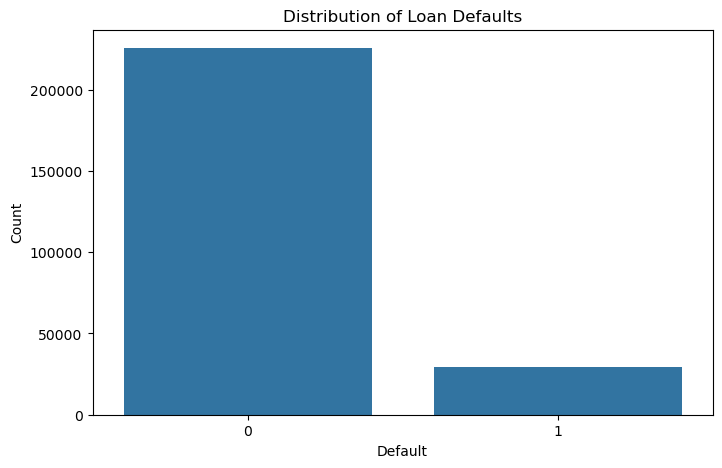

In [10]:
# Visualize the distribution of the 'Default' variable

plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Default')
plt.title('Distribution of Loan Defaults')
plt.xlabel('Default')
plt.ylabel('Count')
plt.show()

In [13]:
df['Default'].value_counts()

0    225694
1     29653
Name: Default, dtype: int64

The visualization shows the distribution of the Default variable:

A significant number of loans have not defaulted (represented by 0) while a smaller proportion of loans have defaulted (represented by 1). This indicates that the dataset is imbalanced, where the majority class (non-defaults) vastly outnumbers the minority class (defaults). This imbalance is important to consider when building machine learning models as it can have an impact on overall model performance and evaluation metrics.

Next, it would be prudent to visualize the distribution of some of the key numerical features, such as Age, Income, LoanAmount, CreditScore, Interest Rate and Debt to Income ratio.

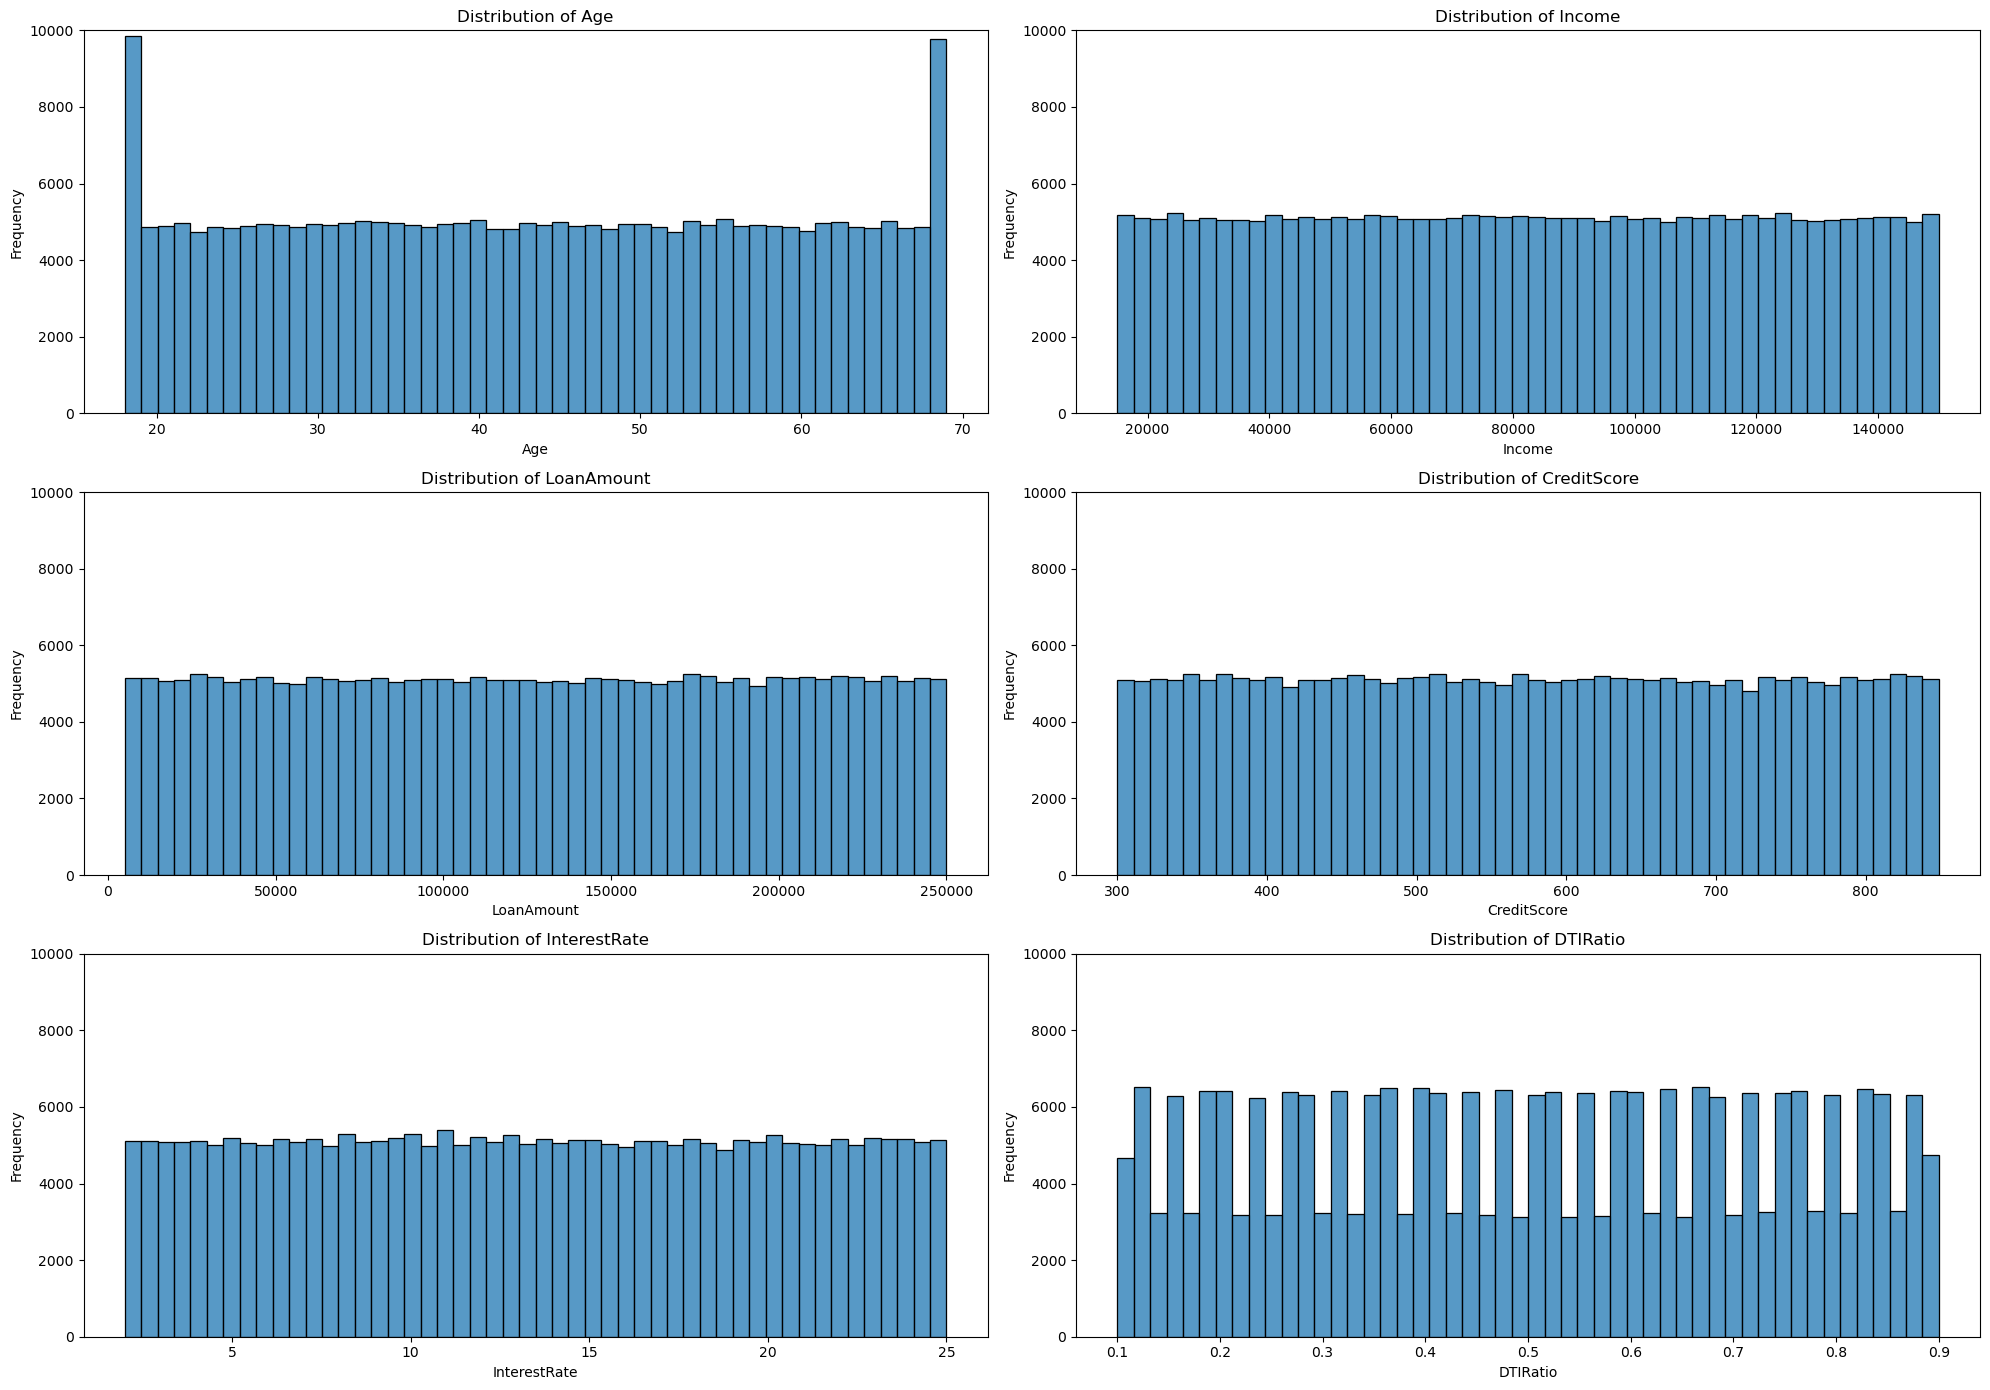

In [11]:
features_to_plot = ['Age', 'Income', 'LoanAmount', 'CreditScore', 'InterestRate', 'DTIRatio']

plt.figure(figsize=(20, 14))

for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(3, 2, i)
    sns.histplot(df[feature], bins=50)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.gca().set_ylim([0, 10000])
    
plt.tight_layout()
plt.show()

Observations:

- The distributions for `Income`, `LoanAmount`, `CreditScore`, `InterestRate` and `DTIRatio` are uniform. 
- The `Age` distribution is mostly uniform except for an increase in frequency for ages in the late 20s to early 40s.


Next, the distributions of some categorical features, such as `Education`, `EmploymentType`, `MaritalStatus` and `LoanPurpose` will be examined visually.

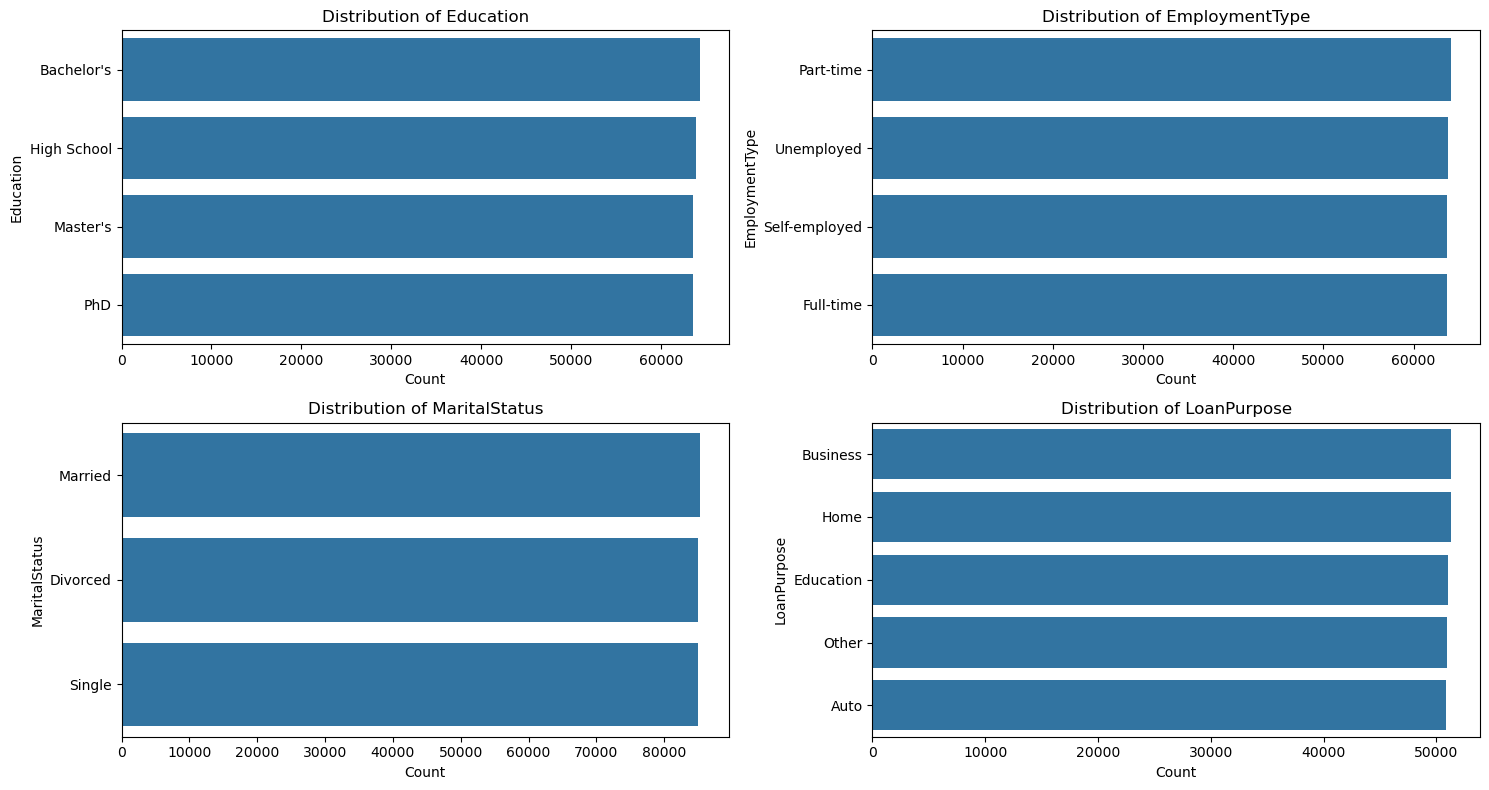

In [12]:
# Visualizing the distribution of some key categorical features

categorical_features = ['Education', 'EmploymentType', 'MaritalStatus', 'LoanPurpose']

plt.figure(figsize=(15, 8))

for i, feature in enumerate(categorical_features, 1):
    plt.subplot(2, 2, i)
    sns.countplot(data=df, y=feature, order=df[feature].value_counts().index)
    plt.title(f'Distribution of {feature}')
    plt.xlabel('Count')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()

Observations from the key categorical features:

The distributions for `Education`, `Employment Type`, `Marital Status` and `Loan Purpose` are, for the most part, uniform.

To further the analysis, the relationship between these categorical features and the likelihood of a loan default is examined. This can provide insights into which categories within these features are more prone to defaulting.

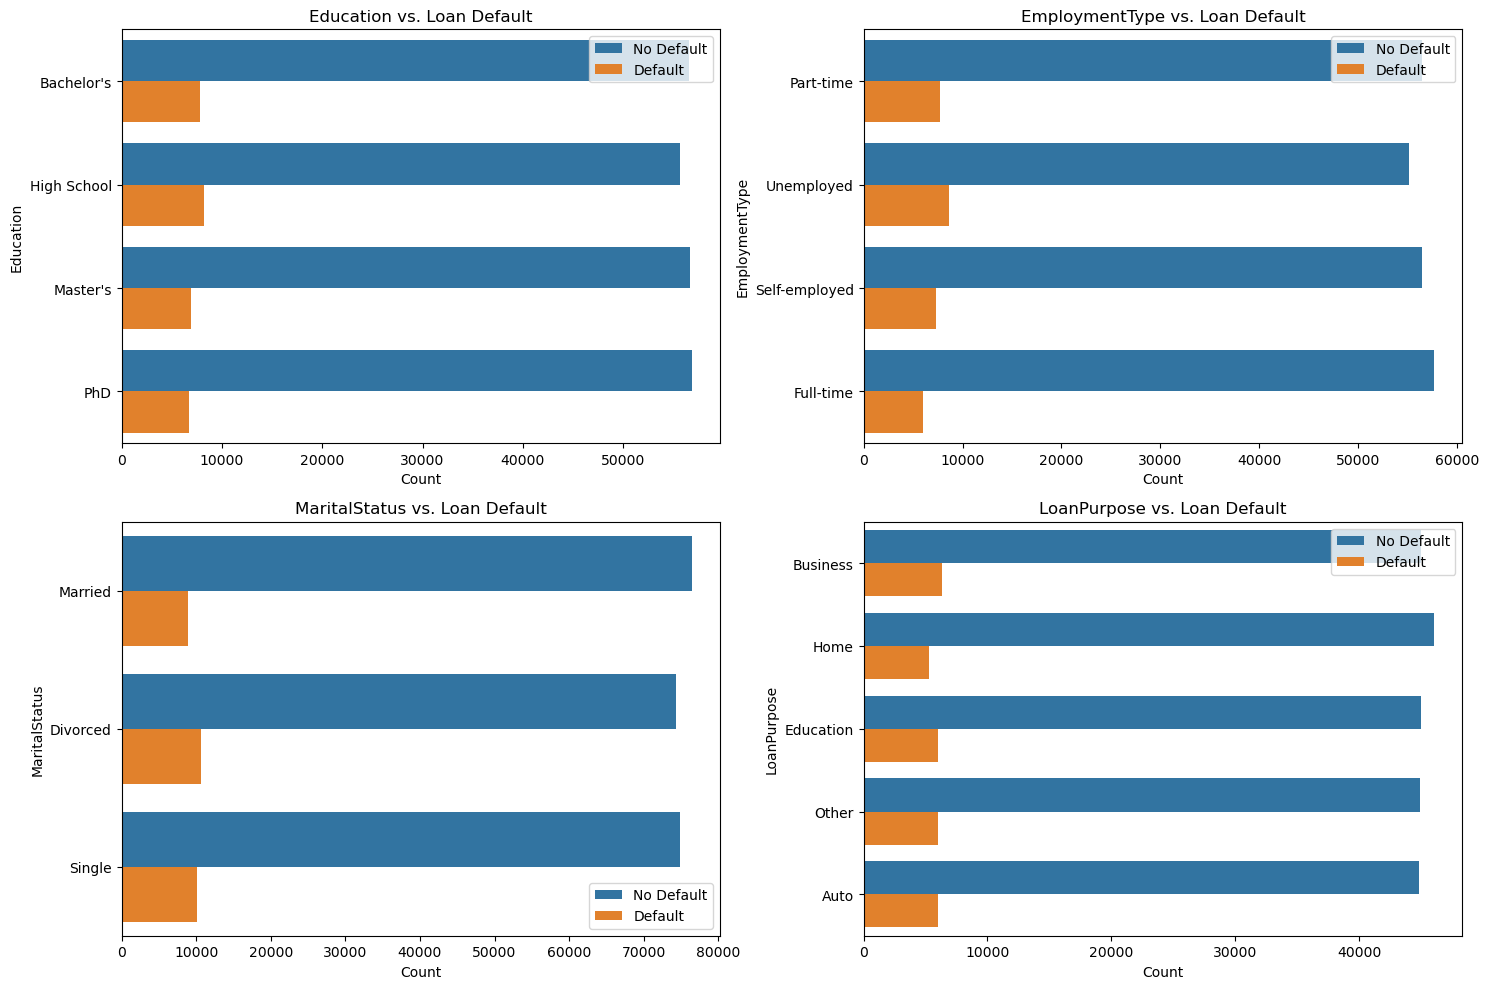

In [13]:
# Exploring the relationship between categorical features and loan default

plt.figure(figsize=(15, 10))

for i, feature in enumerate(categorical_features, 1):
    plt.subplot(2, 2, i)
    sns.countplot(data=df, y=feature, hue='Default', order=df[feature].value_counts().index)
    plt.title(f'{feature} vs. Loan Default')
    plt.xlabel('Count')
    plt.ylabel(feature)
    plt.legend(labels=['No Default', 'Default'])

plt.tight_layout()
plt.show()

Observations:

- `Education`:
  - Borrowers with a high school education and Bachelor's degree seem to have the highest number of defaults, as compared with borrowers with a Master's and PhD.

- `EmploymentType`:
  - Full-time employees have the lowest number of defaults while unemployed borrowers have the highest number of defaults. Additionally, the proportion of defaults relative to the total number of unemployed borrowers is high relative to the other employement types. 
 
- `MaritalStatus`:
  - Divorced borrowers have the highest number of defaults. Additionally, the proportion of defaults relative to the total number of divorced borrowers is highest relative to that of married and single borrowers. Married borrowers have the lowest number of defaults.
 
- `LoanPurpose`:
  - Borrowers who have a loan purpose concerning *Home* have the lowest number of defaults. For the other loan purpose categories, there is little to no variation in the default rates.
  
These insights can form the basis of potential hypotheses:

- Higher education levels might be associated with lower default rates.
- Unemployment might increase the risk of loan default.
- Divorced borrowers may have a higher likelihood of defaulting.
- Borrowers with a loan purpose concerning Home loans may have a lower likelihood of defaulting. 

It is also beneficial to visualize the relationship between numerical features and the likelihood of a loan default.

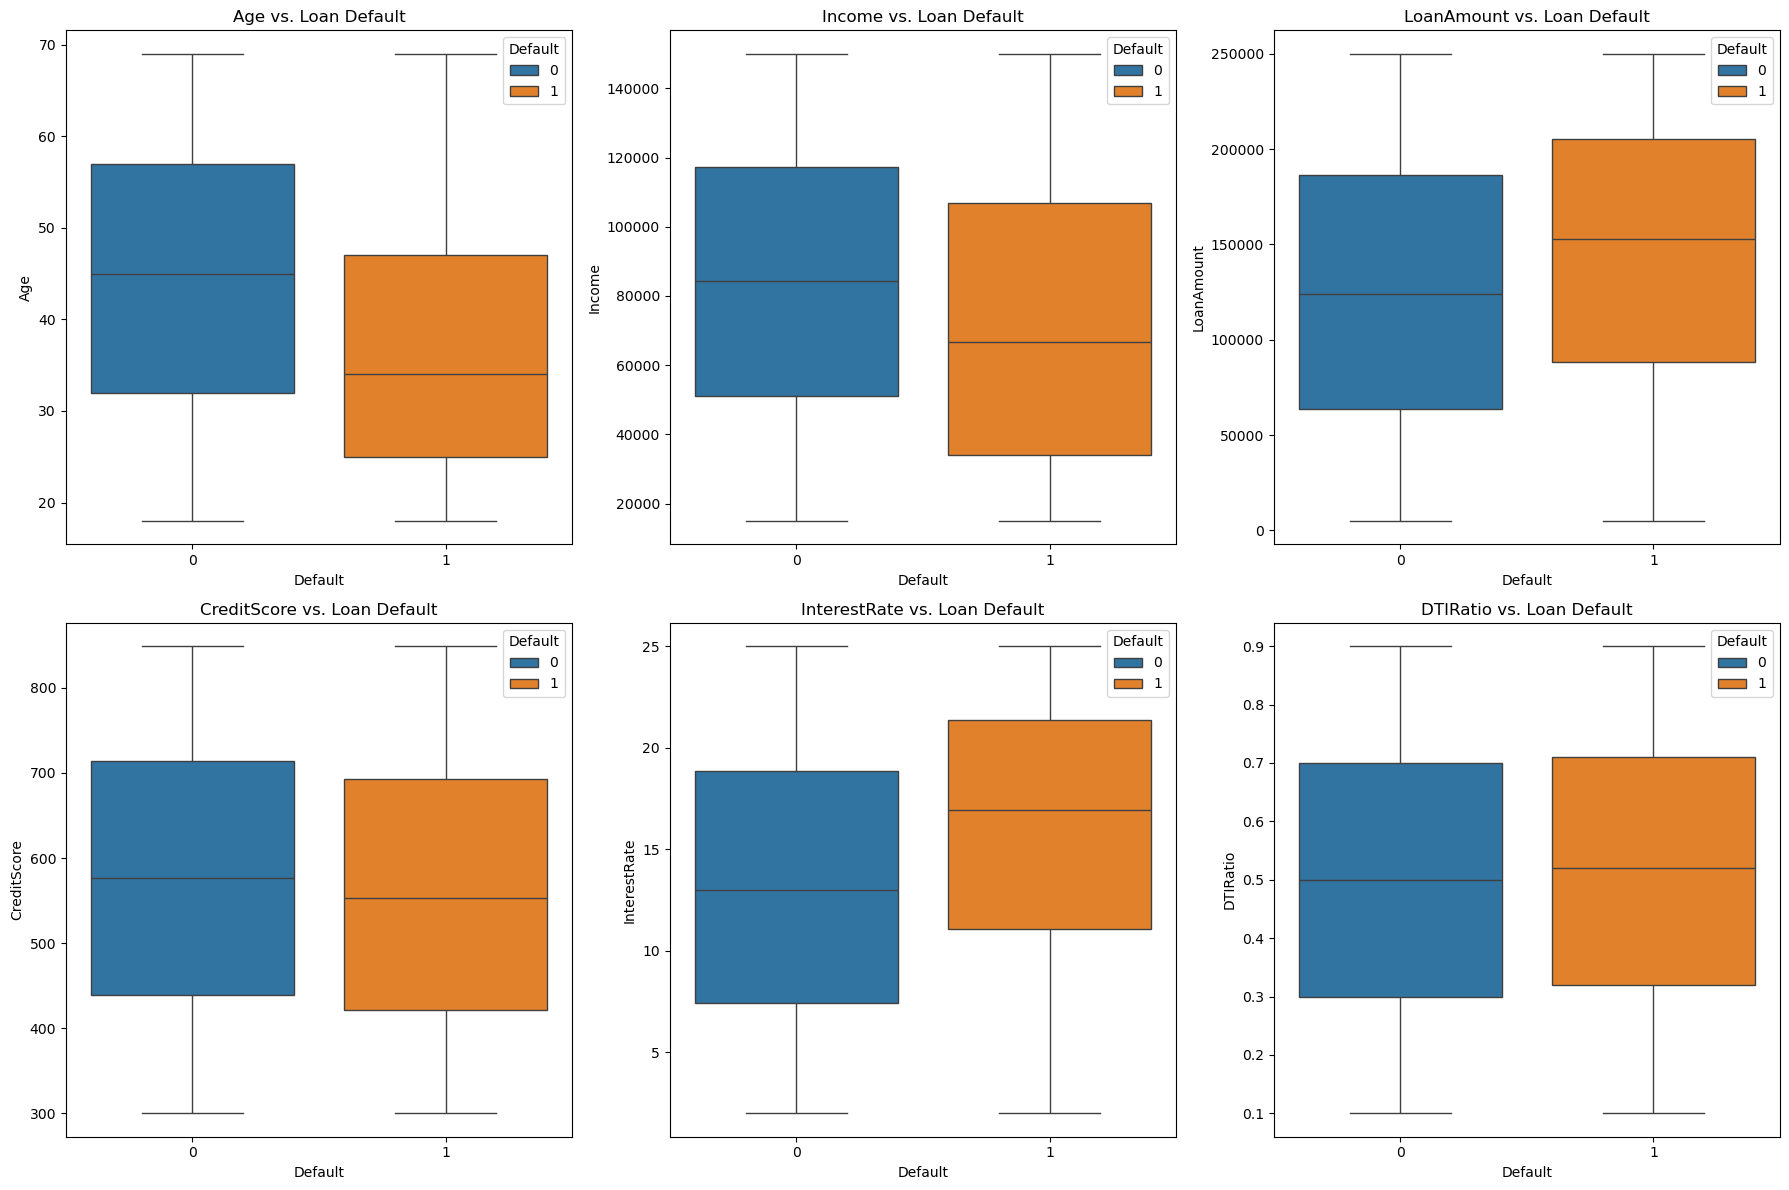

In [14]:
# Visualizing the relationship between numerical features and loan default

numerical_features = ['Age', 'Income', 'LoanAmount', 'CreditScore', 'InterestRate', 'DTIRatio']

plt.figure(figsize=(18, 12))

for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='Default', y=feature, data=df, hue='Default')
    plt.title(f'{feature} vs. Loan Default')
    plt.xlabel('Default')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()

Observations:

- `Age`: The median age of those borrowers who defaulted is lower than that of those who did not default. However, the age range is very similar for both groups.
- `Income`: Borrowers who defaulted generally have a lower median income compared to the income of borrowers who did not default.
- `LoanAmount`: The median loan amount for borrowers who defaulted is higher than for those who did not default.
- `CreditScore`: In line with expectations, borrowers who defaulted tend to have lower credit scores compared to those who did not. In this case, borrowers who defaulted have a slightly lower credit score than borrowers that did not default.
- `InterestRate`: Borrowers who defaulted tend to have higher interest rates on average than borrowers who did not default.
- `DTIRatio`: The Debt-to-Income ratio shows that an insignificant variation in the median for borrowers who defaulted versus borrowers who did not default.

These insights can allow the formulation of additional hypotheses:

- `Age` and `Default`: A younger aged borrower may be more likely to default than an older aged borrower.
- `Income` and `Default`: Lower income for a borrower may increase the risk of default.
- `LoanAmount` and `Default`: A higher loan amount, especially relative to one's income, may increase the risk of default.
- `CreditScore` and `Default`: A lower credit score, indicating a history of poor financial management or previous defaults, is likely correlated with a higher risk of default.
- `InterestRate` and `Default`: A higher interest rate, which increases the financial burden on the borrower, may increase the risk of default.

Finally, a heatmap displaying the Pearson correlation coefficients between the "Default" column and other numerical columns in the dataset would be another effective way to understand the relationship further and refine the initial hypotheses.

A positive correlation indicates that as one variable increases, the target `Default` also tends to increase, while a negative correlation indicates that as one variable increases, the target `Default` tends to decrease.
   
The values range between -1 (perfect negative correlation) and 1 (perfect positive correlation). A value close to 0 indicates a weak correlation.

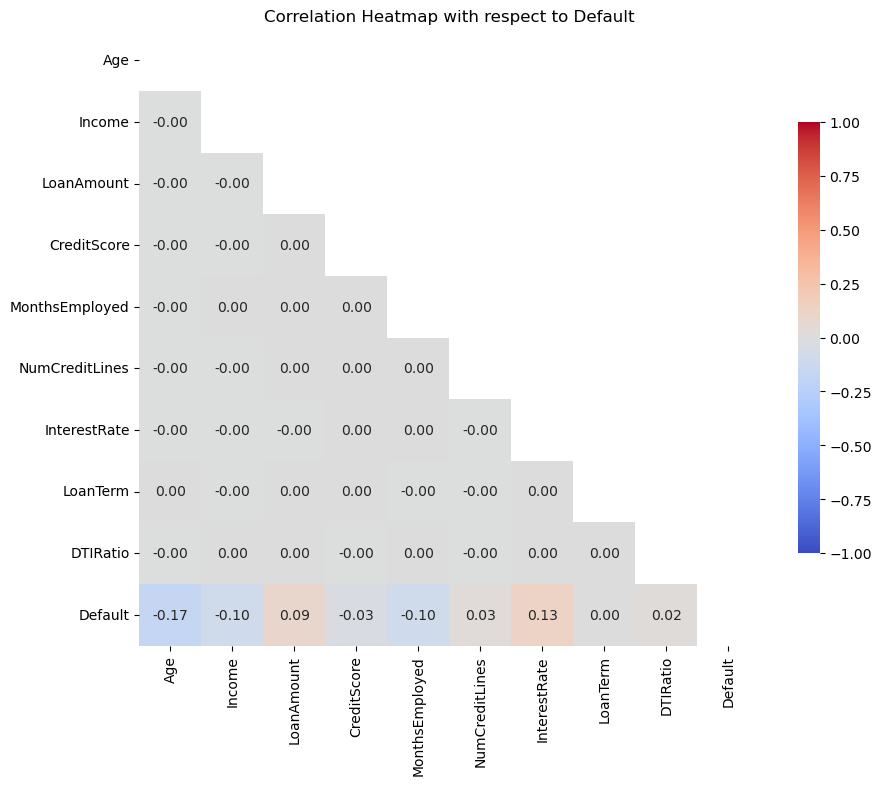

In [15]:
# Calculate correlations for numeric columns with respect to the target variable 'Default'
numeric_cols = df.select_dtypes(include=['float64', 'int64'])
correlations = numeric_cols.corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(correlations, dtype=bool))

# Plotting a heatmap
plt.figure(figsize=(10, 8))
# Set annot=True to annotate cells with rounded values using fmt='.2f'
sns.heatmap(correlations, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1,
            linecolor='none', mask=mask, cbar_kws={"shrink": 0.7})
plt.title('Correlation Heatmap with respect to Default')
plt.show()

Observations from the above heatmap:

- **Default Correlations**:

  - `Age`: There is a weak negative correlation of -0.17 with the target variable `default`. This suggests that as age increases, the likelihood of default decreases slightly. This may be an indication that as people age, they become more financially stable or gain more experience in managing credit.
  
  - `Income`: There is a weak negative correlation of -0.10 with the target variable `default`. This suggests that as an individual's income increases, the likelihood of default decreases slightly.
  
  - `Loan Amount`: There is a weak positive correlation of 0.09 with the target variable `default`. This suggests that as the loan amount increases, the likelihood of default increases slightly. 
  
  - `CreditScore`: There is a weak negative correlation of -0.03 with the target variable `default`. This suggests that individuals with a higher credit score have a slightly lower likelihood of default. This is in line with expectations and intuition, however, given that this is not a very strong correlation, no significant conclusions can be drawn.
  
  - `InterestRate`: There is a weak positive correlation of 0.13 with the target variable `default`. This suggests that higher interest rates may result in a slightly higher likelihood of default. This is in line with expectations and intuition as higher borrowing costs can increase the financial strain on borrowers.

- **Other Notable Correlations**:
  - The features in this dataset show very weak correlations (both positive and negative) with each other, with all coefficients close to zero. This suggests a high degree of independence between the variables and implies a very low degree of multicollinearity.

- **Data Implications**:
  - The low degree of correlation between the independent variables and the target suggests that the model might not strongly predict defaults based on these variables alone. It may be necessary to look for additional predictors or derive more insightful features that could better capture the nuances influencing credit default. This will be further explored and addressed in the data preprocessing and feature engineering phase.

___

## Data Preprocessing & Feature Engineering

In terms of data preprocessing and feature engineering, some techniques utilized will be:

1) **Binning Continuous Variables** like `Age`, `Income` and `CreditScore` into categories:
  - `Age` will be categorized into "Young", "Middle-aged", "Senior".
  - `Income` levels will be categorized as "Low", "Medium", "High".
  - `CreditScore` will be be categorized into "Poor", "Good", "Excellent". 

2) **One-hot Encoding** to convert categorical features like `Education`, `EmploymentType`, `MaritalStatus`, `HasMortgage`, `HasDependents`, `LoanPurpose` and `HasCosigner` as well as the binned continuous variables to numeric values which would be suitable for baseline modeling.
  - Given that the original dataset did not contain many columns, using this technique could be beneficial to add more complexity to the model. 
  
3) **Feature Scaling** in order to normalize certain features to bring them to a similar scale. Features like `Income`, `LoanAmount`, and `CreditScore` have different scales. Scaling them may be necessary for models that are sensitive to feature scales such as logistic regression and support vector machines.

In [16]:
df_2 = df.copy()

The first step is to perform the train-test split before doing any preprocessing or feature engineering. This split is crucial to avoid data leakage, where information from the test set inadvertently influences the training process.

In [17]:
# Separating the target variable from the dataset
y = df_2['Default']
X = df_2.drop('Default', axis=1)

In [18]:
from sklearn.model_selection import train_test_split

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

The next step will be to **Bin Continuous Variables** such as `Age`, `Income` and `CreditScore`.

Binning was considered for this project as it can be useful for turning continuous variables into categorical variables, especially if there are nonlinear relationships between these continuous features and the target variable.

Some of the benefits that this technique could add to the project include:

 - **Simplicity**: The model can be simplified as categorical variables may be easier to interpret and understand as opposed to continuous variables.
 - **Non-linearity**: Non-linear relationships may be captured further by categorizing the data into bins which can have different effects on the target variable.
 - **Outliers**: The model can be made more robust as outliers will be binned into upper and lower categories. 

However, the drawbacks were also considered. These include:
 - **Information Loss**: The granularity of the data is reduced, therefore information can be lost (This is a drawback if the continuous variable is dropped all together).
 - **Arbitrary Boundaries**: The choice of bin thresholds is somewhat arbitrary and may negatively affect the model's performance.
 - **Overfitting**: Too many bins may also result in overfitting the model.

The number of bins selected for `Income` and `CreditScore` was was **3**, while the number of bins selected for `Age` was **4**. This selection was a trade-off between the granularity of the data and the model's simplicity and robustness. A small number of bins may lead to a significant loss of information but may be more robust to overfitting. In contrast, a larger number of bins will retain more information, however, it may be far more susceptible to overfitting. This will be an iterative process and the number of bins will be experimented with after a baseline model is completed.  

In [46]:
# Binning the Income variable
# Bins chosen as 0-25K for Low, 25K-75K for Medium and 75K-150K for High
income_bins = [0, 25000, 75000, 150000]
bin_labels = ['Low', 'Medium', 'High']
X_train['IncomeBin'] = pd.cut(df_2['Income'], bins=income_bins, labels=bin_labels)
X_test['IncomeBin'] = pd.cut(df_2['Income'], bins=income_bins, labels=bin_labels)

In [47]:
# Binning the Credit score variable
# Bins chosen as 300-450 for Low, 450-650 for Medium and 650-850 for High
credit_score_bins = [300, 450, 650, 850] 
bin_labels_credit_score = ['Low', 'Medium', 'High']
X_train['CreditScoreBin'] = pd.cut(df_2['CreditScore'], bins=credit_score_bins, labels=bin_labels_credit_score)
X_test['CreditScoreBin'] = pd.cut(df_2['CreditScore'], bins=credit_score_bins, labels=bin_labels_credit_score)

In [48]:
# Binning the Age variable
# Bins chosen as 18-25 for Youth, 25-45 for Adult, 45-60 for Middle Age and 60-70 for Senior
age_bins = [18, 25, 45, 60, 70]
bin_labels_age = ['Youth', 'Adult', 'Middle_Age', 'Senior']

# Binning 'Age'
X_train['AgeBin'] = pd.cut(df_2['Age'], bins=age_bins, labels=bin_labels_age)
X_test['AgeBin'] = pd.cut(df_2['Age'], bins=age_bins, labels=bin_labels_age)

The next step will be to **One-hot Encode** the binned features as well as the categorical columns in the dataset in order to convert them into numerical columns which is necessary for modeling. 

For each binned features and categorical column (except LoanID), binary columns are created (dummy variables) for each category within the column. The drop='first' parameter is used to avoid multicollinearity by dropping the first dummy variable for each original categorical variable.

In [49]:
# Using pd.get_dummies to one-hot encode the binned columns
binned_features = ['IncomeBin', 'CreditScoreBin', 'AgeBin']
X_train_2 = pd.get_dummies(X_train, columns=binned_features, drop_first=True)
X_test_2 = pd.get_dummies(X_test, columns=binned_features, drop_first=True)

# Display the first few rows of the new dataframe with one-hot encoded binned columns
X_train_2.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,...,HasDependents,LoanPurpose,HasCoSigner,IncomeBin_Medium,IncomeBin_High,CreditScoreBin_Medium,CreditScoreBin_High,AgeBin_Adult,AgeBin_Middle_Age,AgeBin_Senior
15826,594NL7A9XL,45,37039,247916,624,19,2,4.62,60,0.85,...,Yes,Auto,No,1,0,1,0,1,0,0
147371,PEL2SS9L0Z,48,133963,66275,494,119,3,14.72,48,0.49,...,Yes,Other,Yes,0,1,1,0,0,1,0
178180,EOZQHPP6SX,47,100204,6967,718,108,3,5.51,24,0.76,...,Yes,Business,Yes,0,1,0,1,0,1,0
126915,J3SQBN86G0,42,36078,25966,344,2,3,18.29,36,0.76,...,Yes,Education,No,1,0,0,0,1,0,0
163930,ANA0RNSPRW,20,99464,248557,318,74,3,19.45,60,0.45,...,No,Auto,Yes,0,1,0,0,0,0,0


In [50]:
X_test_2.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,...,HasDependents,LoanPurpose,HasCoSigner,IncomeBin_Medium,IncomeBin_High,CreditScoreBin_Medium,CreditScoreBin_High,AgeBin_Adult,AgeBin_Middle_Age,AgeBin_Senior
211648,SJJNN2DFZ7,54,20956,87156,789,102,4,8.99,24,0.65,...,Yes,Education,No,0,0,0,1,0,1,0
201101,GOC4OI55T8,49,138499,227279,603,102,4,2.46,12,0.67,...,No,Home,No,0,1,1,0,0,1,0
140423,QO6XNPEH8P,69,22538,48532,337,48,2,16.15,24,0.74,...,Yes,Other,No,0,0,0,0,0,0,1
204530,3VLC51ZYU8,58,34754,134218,531,107,3,24.73,60,0.55,...,No,Education,No,1,0,1,0,0,1,0
166481,OUGXQD95MI,35,47430,130554,484,30,2,2.19,48,0.80,...,No,Home,Yes,1,0,1,0,1,0,0


The dummy variables were successfully created for the binned columns. The next step will be to one-hot encode the other categorical columns in the dataset.

In [51]:
# Using pd.get_dummies to one-hot encode the categorical columns (except LoanID)
categorical_cols_train = X_train_2.select_dtypes(include=['object']).columns
categorical_cols_test = X_test_2.select_dtypes(include=['object']).columns

# We will not one-hot encode the 'LoanID' as it is a unique identifier for each loan
categorical_cols_to_convert_train = categorical_cols_train.drop('LoanID')
categorical_cols_to_convert_test = categorical_cols_test.drop('LoanID')

X_train_3 = pd.get_dummies(X_train_2, columns=categorical_cols_to_convert, drop_first=True)
X_test_3 = pd.get_dummies(X_test_2, columns=categorical_cols_to_convert, drop_first=True)

# Display the first few rows of the new dataframe with one-hot encoded binned columns
X_train_3.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,...,EmploymentType_Unemployed,MaritalStatus_Married,MaritalStatus_Single,HasMortgage_Yes,HasDependents_Yes,LoanPurpose_Business,LoanPurpose_Education,LoanPurpose_Home,LoanPurpose_Other,HasCoSigner_Yes
15826,594NL7A9XL,45,37039,247916,624,19,2,4.62,60,0.85,...,1,1,0,0,1,0,0,0,0,0
147371,PEL2SS9L0Z,48,133963,66275,494,119,3,14.72,48,0.49,...,0,1,0,1,1,0,0,0,1,1
178180,EOZQHPP6SX,47,100204,6967,718,108,3,5.51,24,0.76,...,0,0,1,1,1,1,0,0,0,1
126915,J3SQBN86G0,42,36078,25966,344,2,3,18.29,36,0.76,...,0,1,0,0,1,0,1,0,0,0
163930,ANA0RNSPRW,20,99464,248557,318,74,3,19.45,60,0.45,...,0,0,0,0,0,0,0,0,0,1


In [52]:
X_test_3.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,...,EmploymentType_Unemployed,MaritalStatus_Married,MaritalStatus_Single,HasMortgage_Yes,HasDependents_Yes,LoanPurpose_Business,LoanPurpose_Education,LoanPurpose_Home,LoanPurpose_Other,HasCoSigner_Yes
211648,SJJNN2DFZ7,54,20956,87156,789,102,4,8.99,24,0.65,...,0,0,1,1,1,0,1,0,0,0
201101,GOC4OI55T8,49,138499,227279,603,102,4,2.46,12,0.67,...,0,1,0,1,0,0,0,1,0,0
140423,QO6XNPEH8P,69,22538,48532,337,48,2,16.15,24,0.74,...,0,0,0,1,1,0,0,0,1,0
204530,3VLC51ZYU8,58,34754,134218,531,107,3,24.73,60,0.55,...,1,1,0,0,0,0,1,0,0,0
166481,OUGXQD95MI,35,47430,130554,484,30,2,2.19,48,0.80,...,0,1,0,0,0,0,0,1,0,1


The appropriate columns have been successfully converted into numerical columns using One-hot Encoding.

The last step is to **scale** the features as there may be several algorithms utilized for this project which are sensitive to feature magnitudes. For this, StandardScaler will be used; it will be fit and transformed on the train set and only transformed on the test set. 

In [74]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

X_train_final = X_train_3.drop('LoanID', axis=1)
X_test_final = X_test_3.drop('LoanID', axis=1)

# Fit the scaler on the training data and transform both training and test data
X_train_scaled = scaler.fit_transform(X_train_final)
X_test_scaled = scaler.transform(X_test_final)

----

## Baseline Modeling

Now that the dataset is cleaned and preprocessed, the next step is to perform baseline modeling.

In the baseline model development phase, simple models will be built to establish a baseline performance. Since this is a classification problem (predicting whether a loan will default), Logistic Regression and Decision Tree will be used as starting points. 

**Model Evaluation Framework**

For evaluating these models, given that this is a  binary classification problem, the metrics used include:

 - Accuracy: The proportion of correctly predicted instances.
 - Precision and Recall: Precision is the proportion of true positives over all positive predictions. Recall is the proportion of true positives over all actual positives.
 - F1 Score: The harmonic mean of precision and recall.
 - ROC-AUC: The area under the Receiver Operating Characteristic curve, which plots the true positive rate against the false positive rate.

Given that loan defaults in this dataset is a relatively rare event, precision and recall will be more important metrics than overall accuracy. The F1 score combines these two metrics, and the ROC-AUC is useful for evaluating the performance across different classification thresholds.


In [88]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Fit the logistic regression model
logreg = LogisticRegression(max_iter=10000, random_state=42)
logreg.fit(X_train_scaled, y_train)

# Predictions
train_preds = logreg.predict(X_train_scaled)
test_preds = logreg.predict(X_test_scaled)

# Calculate accuracy
train_accuracy = accuracy_score(y_train, train_preds)
test_accuracy = accuracy_score(y_test, test_preds)

train_accuracy, test_accuracy

(0.8857727497466675, 0.8859800274133542)

The train accuracy for the baseline **Logistic Regression model** is 88.5% and the test accuracy is also 88.5%. To evaluate this model, a confusion matrix is analyzed below.

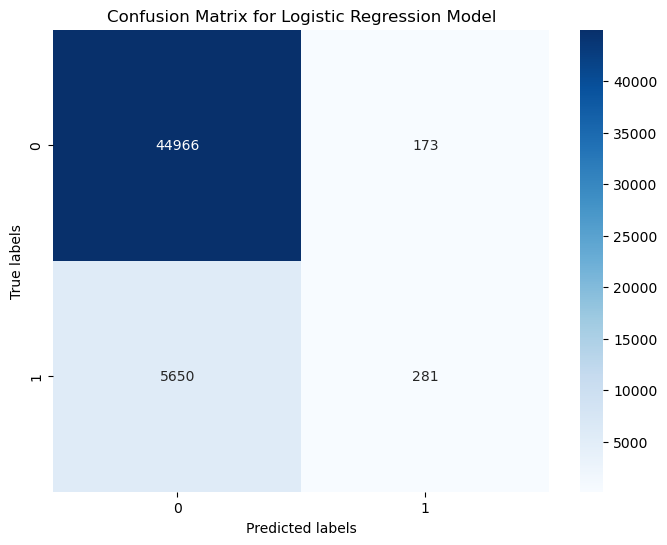

              precision    recall  f1-score   support

           0       0.89      1.00      0.94     45139
           1       0.62      0.05      0.09      5931

    accuracy                           0.89     51070
   macro avg       0.75      0.52      0.51     51070
weighted avg       0.86      0.89      0.84     51070



In [97]:
from sklearn.metrics import confusion_matrix, classification_report

# Predicting the target values for test set
y_pred = logreg.predict(X_test_scaled)

# Generating the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualizing the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for Logistic Regression Model')
plt.show()

# Printing classification report
print(classification_report(y_test, y_pred))

### Classification Report Interpretation for Logistic Regression Model

1) Class 0 (Non-defaults)
 - Precision: 0.89 indicates that 89% of the loans predicted as non-defaults were actually non-defaults.
 - Recall: 1.00 implies that the model correctly identified 100% of the non-default loans.
 - F1-Score: 0.94 is a measure of the test's accuracy. It is high which indicates good performance for class 0.

2) Class 1 (Defaults)
 - Precision: 0.62 indicates that 62% of the loans predicted as defaults were actually defaults.
 - Recall: 0.05 is very low, indicating that the model only correctly identified 5% of the actual default loans.
 - F1-Score: 0.09 is very low, suggesting poor performance in identifying default loans.

3) Overall Model Performance
 - Accuracy: 0.89 or 89%, indicates the proportion of total predictions that were correct. However, this high accuracy is mainly due to the model's ability to identify non-default loans rather than defaults.
 - Macro Average: Averages the performance across classes without taking class imbalance into account. The macro average F1-Score (0.51) is relatively low, indicating that the model's performance is not as effective for the minority class (defaults).
 - Weighted Average: Takes class imbalance into account. The weighted average F1-Score (0.84) is higher, reflecting the dominance of the majority class (non-defaults) in the dataset.


**Key Insights**

The logistic regression model is highly effective in identifying non-default loans but struggles significantly with correctly identifying default loans.
The low recall for class 1 (defaults) suggests that the model is prone to missing a high number of actual defaults (high false negatives for defaults).
The overall high accuracy is somewhat misleading due to the imbalanced nature of the dataset, where non-defaults are much more common than defaults.
It is crucial to improve the model's ability to detect defaults (Class 1) while maintaining its performance on non-defaults. This will likely involve techniques like resampling, using different models, or tuning the current model's parameters.

In [90]:
from sklearn.tree import DecisionTreeClassifier

# Fit the DT model
DT = DecisionTreeClassifier()
DT.fit(X_train_scaled, y_train)

# Predictions
train_preds = DT.predict(X_train_scaled)
test_preds = DT.predict(X_test_scaled)

# Calculate accuracy
train_accuracy = accuracy_score(y_train, train_preds)
test_accuracy = accuracy_score(y_test, test_preds)

train_accuracy, test_accuracy

(1.0, 0.8008811435284903)

The train accuracy for the baseline **Decision Tree model** is 100% which means it is overfitting and the test accuracy is also 80%. To evaluate this model, a confusion matrix is analyzed below.

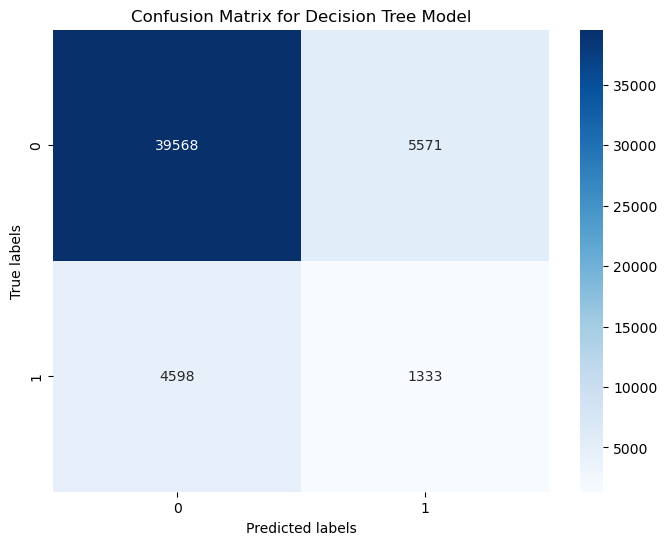

              precision    recall  f1-score   support

           0       0.90      0.88      0.89     45139
           1       0.19      0.22      0.21      5931

    accuracy                           0.80     51070
   macro avg       0.54      0.55      0.55     51070
weighted avg       0.81      0.80      0.81     51070



In [100]:
# Predicting the target values for test set
y_pred_DT = DT.predict(X_test_scaled)

# Generating the confusion matrix
conf_matrix_DT = confusion_matrix(y_test, y_pred_DT)

# Visualizing the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_DT, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for Decision Tree Model')
plt.show()

# Printing classification report
print(classification_report(y_test, y_pred_DT))

### Classification Report Interpretation for Decision Tree model

1) Class 0 (Non-defaults)
 - Precision: 0.90 indicates that 90% of the loans predicted as non-defaults were actually non-defaults.
 - Recall: 0.88 suggests that the model correctly identified 88% of the non-default loans.
 - F1-Score: 0.89 is high, indicating good performance for class 0, but slightly lower than in the Logistic Regression model.

2) Class 1 (Defaults)
 - Precision: 0.19 means that only 19% of the loans predicted as defaults were actually defaults. This is a low precision, indicating many false positives.
 - Recall: 0.22 is also low, but higher than in the Logistic Regression model. It indicates that the model correctly identified 22% of the actual default loans.
 - F1-Score: 0.21 is low, suggesting poor performance in identifying default loans, but it is somewhat better than the Logistic Regression model's performance for this class.

3) Overall Model Performance
 - Accuracy: 0.80 or 80%, though lower than the Logistic Regression model, is still relatively high. However, like the Logistic Regression model, this is influenced more by the model's performance on the majority class.
 - Macro Average: 0.55 is slightly higher than that of the Logistic Regression model, indicating a somewhat more balanced performance across both classes.
 - Weighted Average: The weighted average F1-Score (0.81) and is lower compared to Logistic Regression, reflecting the decision tree's overall lower accuracy.

**Key Insights**

The Decision Tree model shows a more balanced performance between the two classes compared to Logistic Regression, but with overall lower accuracy and precision.
The model still struggles with classifying defaults accurately, with a considerable number of false positives and false negatives.
Despite a slightly better recall for defaults than Logistic Regression, the precision is significantly lower, indicating a high number of false positives (incorrectly identifying non-defaults as defaults). In summary, the Decision Tree model provides a more balanced performance across classes but with overall lower accuracy and precision than the Logistic Regression model. It demonstrates better recall for the minority class (defaults) but at the cost of many false positives.

___

## Next Steps: Advanced Modeling & Productizing the work

These steps aim to refine the models, address existing challenges, and prepare the work for practical application.

1. Advanced Modeling Techniques
 - The next steps are to experiment with more complex and sophisticated models such as Random Forests, Gradient Boosting Machines and Support Vector Machines which might handle the imbalanced dataset better.

 - Model Tuning: Using grid search or random search for hyperparameter tuning to optimize model performance.

 - Feature Selection: Reassess the features used in the models.

2. Evaluation Strategy Enhancement
 - Cross-Validation: Implement k-fold cross-validation for a more robust evaluation of model performance.

 - Alternative Metrics: Explore additional metrics like the Area Under the Precision-Recall Curve (AUPRC), especially since your dataset is imbalanced.
 
3. Productizing the Model
 - Model Deployment: Choose a platform for deploying the model (e.g., AWS, Azure, Google Cloud, or a local server).